Assessment notebook 2
Data source: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset/data

In [32]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

In [33]:
# Read data
df = pd.read_csv("credit_card_transactions.csv")

In [34]:
# data = df.sample(n= 250000, random_state = 48)
data = df.copy()

In [35]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract year and month
data['year_month'] = data['trans_date_trans_time'].dt.to_period('M')
data['year_month'] = data['year_month'].dt.to_timestamp()

In [36]:
# Aggregate monthly spending
# Group by month and sum amount
monthly = data.groupby('year_month')['amt'].sum().reset_index()
# monthly = data.groupby(pd.Grouper(key='trans_date_trans_time', freq='MS')).agg({'amt': 'sum'})
# monthly.index.freq = 'MS'

In [37]:
# linear regression
monthly['month_index'] = np.arange(len(monthly))
x = monthly[['month_index']]
y = monthly['amt']
lr = LinearRegression()
lr.fit(x, y)
monthly['predicted_amt'] = lr.predict(x)

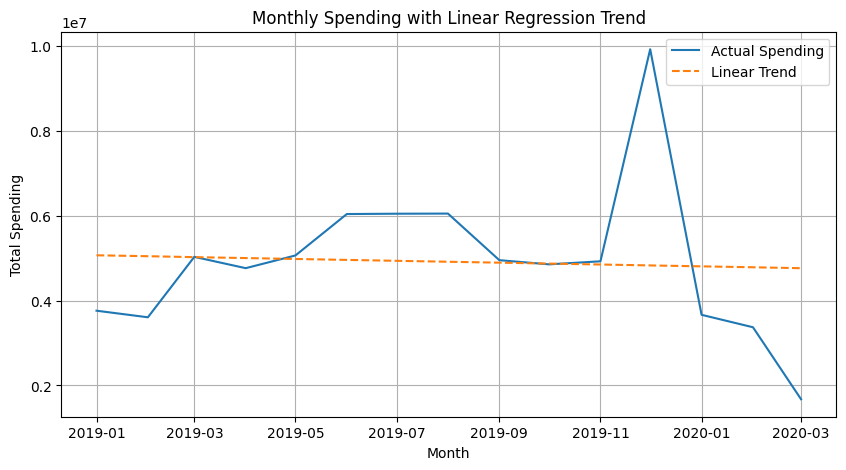

In [38]:
# Plot linear regression
plt.figure(figsize=(10, 5))
plt.plot(monthly['year_month'], monthly['amt'], label='Actual Spending')
plt.plot(monthly['year_month'], monthly['predicted_amt'], label='Linear Trend', linestyle='--')
plt.title('Monthly Spending with Linear Regression Trend')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend()
plt.grid()
plt.show()

In [52]:
# ARIMA model for future prediction
# Set index for time series
# ts_data = monthly.set_index('year_month')
ts_data = monthly['amt']

# Fit ARIMA model (simple ARIMA(1,1,1) to start)
model = sm.tsa.ARIMA(ts_data, order=(1,1,1))
results = model.fit()

# Forecast next 6 months
forecast = results.get_forecast(steps=6)
forecast_df = forecast.summary_frame()

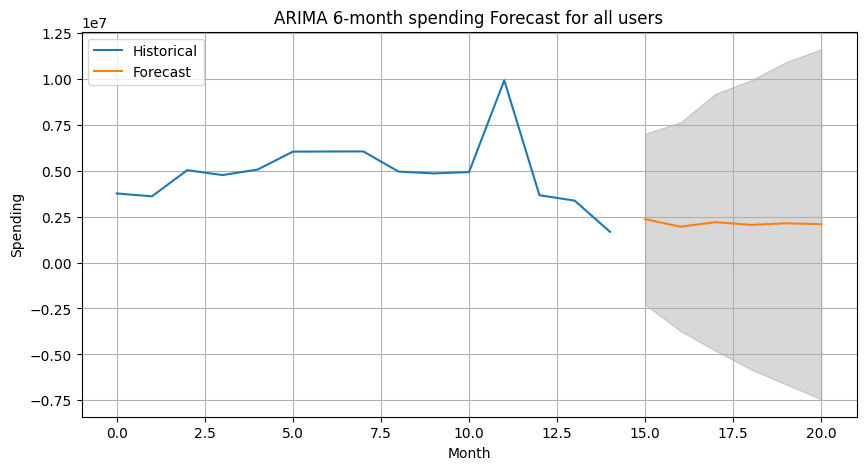

In [53]:
# Plot ARIMA model
plt.figure(figsize=(10,5))
plt.plot(ts_data, label='Historical')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='gray', alpha=0.3)
plt.title('ARIMA 6-month spending Forecast for all users')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.legend()
plt.grid()
plt.show()

In [54]:
# Aggregate monthly spending for specific user
# Filter user data
current_year = datetime.now().year
df_filtered = data.copy()
df_filtered['dob'] = pd.to_datetime(df_filtered['dob'])
df_filtered['calculated_age'] = current_year - df_filtered['dob'].dt.year

user_data = df_filtered[
    (df_filtered['first'].str.lower() == 'jennifer') &
    (df_filtered['last'].str.lower() == 'banks') &
    (df_filtered['calculated_age'] == 37)
]

monthly_user = user_data.groupby('year_month')['amt'].sum().reset_index()

In [55]:
# linear regression for user
monthly_user['month_index'] = np.arange(len(monthly_user))
x_user = monthly_user[['month_index']]
y_user = monthly_user['amt']
lr = LinearRegression()
lr.fit(x_user, y_user)
monthly_user['predicted_amt'] = lr.predict(x_user)

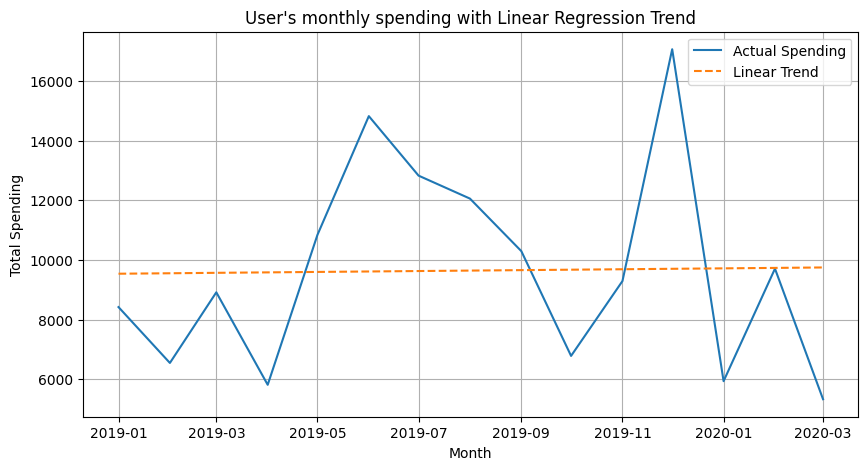

In [56]:
# Plot linear regression for user
plt.figure(figsize=(10, 5))
plt.plot(monthly_user['year_month'], monthly_user['amt'], label='Actual Spending')
plt.plot(monthly_user['year_month'], monthly_user['predicted_amt'], label='Linear Trend', linestyle='--')
plt.title('User\'s monthly spending with Linear Regression Trend')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend()
plt.grid()
plt.show()

In [61]:
# ARIMA model for user's future prediction
ts_data_user = monthly_user['amt']

# Fit ARIMA model (simple ARIMA(1,1,1) to start)
model_user = sm.tsa.ARIMA(ts_data_user, order=(1,1,1))
results_user = model_user.fit()

# Forecast next 6 months
forecast_user = results_user.get_forecast(steps=6)
forecast_df_user = forecast_user.summary_frame()

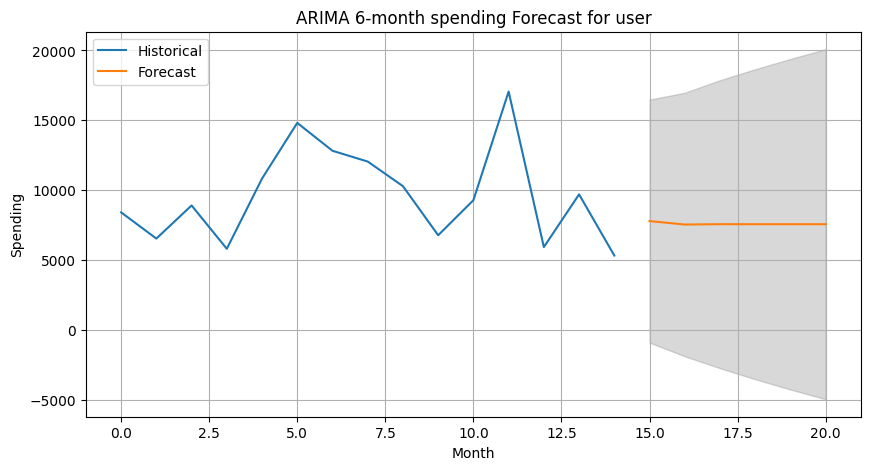

In [59]:
# Plot ARIMA model
plt.figure(figsize=(10,5))
plt.plot(ts_data_user, label='Historical')
plt.plot(forecast_df_user.index, forecast_df_user['mean'], label='Forecast')
plt.fill_between(forecast_df_user.index, forecast_df_user['mean_ci_lower'], forecast_df_user['mean_ci_upper'], color='gray', alpha=0.3)
plt.title('ARIMA 6-month spending Forecast for user')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.legend()
plt.grid()
plt.show()